In [1]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn import tree
from sklearn.tree import _tree

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 

sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


INFILE = "C:\\Users\\Owner\\Documents\\Northwestern\\Intro_MachineLearning\\Unit1\\Lecture02B_MissingValueImputationForNumericVariables\\Insurance.csv"

TARGET_F = "TARGET_CLM_FLAG"
TARGET_A = "TARGET_CLM_AMT"


df = pd.read_csv( INFILE )
dt = df.dtypes

In [2]:
objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )


##print(" OBJECTS ")
##print(" ------- ")
##for i in objList :
##    print( i )
##print(" ------- ")


##print(" NUMBER ")
##print(" ------- ")
##for i in numList :
##    print( i )
##print(" ------- ")

"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )


dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )

'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''

df["y_EDU_4"] = (df.EDUCATION.isin( ["a_PhD"] ) + 0 )
df["y_EDU_3"] = (df.EDUCATION.isin( ["a_PhD","b_Masters"] ) + 0)
df["y_EDU_2"] = (df.EDUCATION.isin( ["a_PhD","b_Masters","c_Bachelors"] ) + 0)
df["y_EDU_1"] = (df.EDUCATION.isin( ["a_PhD","b_Masters","c_Bachelors","d_High School"] ) + 0)
df = df.drop( "EDUCATION", axis=1 )
   

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )


for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=True )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    #df = df.drop( i, axis=1 )


#g = df.groupby("IMP_JOB")
#i = "INCOME"
#print( g[i].median() )

i = "INCOME"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Blue Collar"]), IMP ] = 53694
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Student"]), IMP ] = 360
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Clerical"]), IMP ] = 30799
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Doctor"]), IMP ] = 121398
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Home Maker"]), IMP ] = 776
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Lawyer"]), IMP ] = 83230
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 109953
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Manager"]), IMP ] = 78589
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Professional"]), IMP ] = 71230
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)


for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )


for i in objList:
    df = df.drop( i, axis=1 )
    
df.head().T

,0,1,2,3,4
TARGET_CLM_FLAG,0.0,1.0,1.0,0.0,1.0
TARGET_CLM_AMT,NaN,6872.0,6716.0,NaN,5970.0
KIDSDRIV,0.0,0.0,3.0,0.0,0.0
HOMEKIDS,0.0,0.0,4.0,0.0,4.0
TRAVTIME,25.0,23.0,54.0,44.0,33.0
BLUEBOOK,25860.0,16400.0,1500.0,10950.0,7850.0
TIF,4.0,4.0,4.0,4.0,6.0
NPOLICY,2.0,2.0,2.0,1.0,2.0
OLDCLAIM,0.0,0.0,0.0,0.0,0.0
CLM_FREQ,0.0,0.0,0.0,0.0,0.0


In [3]:
"""
SPLIT DATA
"""

X = df.copy()
X = X.drop( TARGET_F, axis=1 )
X = X.drop( TARGET_A, axis=1 )

Y = df[ [TARGET_F, TARGET_A] ]

#'random_state =1...could change it for ex to 3, to see what gave the best model, i.e highest accuracy and test close to train'
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2 )


# ~ means not...F = all the amounts that are not null
F = ~ Y_train[ TARGET_A ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_A ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

print( Z_train.describe() )
print( Z_test.describe() )
print( "\n\n")

print( "FLAG DATA" )
print( "TRAINING = ", X_train.shape )
print( "TEST = ", X_test.shape )


#Assign any large loss amount outliers to 25000
F = Z_train[ TARGET_A ] > 25000
Z_train.loc[ F, TARGET_A ] = 25000

F = Z_test[ TARGET_A ] > 25000
Z_test.loc[ F, [TARGET_A] ] = 25000

print( Z_train.describe() )
print( Z_test.describe() )
print( "\n\n")

#Y_train.head().T
#Z_train.head().T

       TARGET_CLM_FLAG  TARGET_CLM_AMT
count           2195.0     2195.000000
mean               1.0     5701.100683
std                0.0     7979.063159
min                1.0       59.000000
25%                1.0     2613.000000
50%                1.0     4083.000000
75%                1.0     5727.500000
max                1.0   123247.000000
       TARGET_CLM_FLAG  TARGET_CLM_AMT
count            551.0      551.000000
mean               1.0     5544.738657
std                0.0     6817.690173
min                1.0       30.000000
25%                1.0     2748.000000
50%                1.0     4255.000000
75%                1.0     5734.500000
max                1.0    77907.000000



FLAG DATA
TRAINING =  (8241, 43)
TEST =  (2061, 43)
       TARGET_CLM_FLAG  TARGET_CLM_AMT
count           2195.0     2195.000000
mean               1.0     5169.959453
std                0.0     4781.400149
min                1.0       59.000000
25%                1.0     2613.000000
50%      

In [4]:
# CRASH PROBABILITY

fm01_Tree = tree.DecisionTreeClassifier( max_depth=4 )

## DecisionTreeRegressor will give you the bad rate in the tree instead of the values
#fm01_Tree = tree.DecisionTreeRegressor( max_depth=4 )
fm01_Tree = fm01_Tree.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_Tree.predict(X_train)
Y_Pred_test = fm01_Tree.predict(X_test)

print("\n=============\n")
print("DECISION TREE\n")
print("Probability of crash")
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")



DECISION TREE

Probability of crash
Accuracy Train: 0.758645795413178
Accuracy Test: 0.7481804949053857




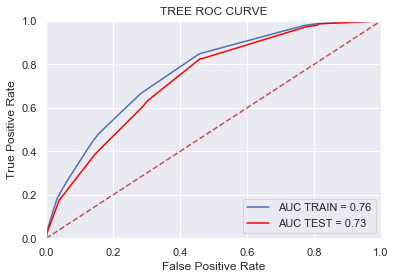

In [5]:
'getting all the probabilities of car crashes and putting it into p1'

probs = fm01_Tree.predict_proba(X_train)
p1 = probs[:,1]

'false positive rate, true positive rate, threshold'
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)


probs = fm01_Tree.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test


plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
#'grabs the actual variable names from the dataset to be used in the graphviz tree'
feature_cols = list( X.columns.values )

#'creates a text file that contains the data formated to be used to create a graphviz tree'
#'Google 'graphvize viewer online free', result http://www.webgraphviz.com/'
#'Past text file contents into online graphize viewer'
tree.export_graphviz(fm01_Tree,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"])

In [8]:
"""
Function to go thru the DECISION TREE and grab all the variables, Decision Trees can be used for Variable Selection
"""

def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

vars_tree_flag = getTreeVars( fm01_Tree, feature_cols ) 

for i in vars_tree_flag :
    print(i)
#'Updates the Random State 5-10 times and re-runs and reflects which variables show up, the ones that show up consistently are the predictive one'

KIDSDRIV
TRAVTIME
IMP_INCOME
NPOLICY
OLDCLAIM
MVR_PTS
IMP_HOME_VAL
y_EDU_2
z_PARENT1_Yes
z_REVOKED_Yes
z_URBANICITY_Highly Urban/ Urban


In [9]:
# DAMAGES

amt_m01_Tree = tree.DecisionTreeRegressor( max_depth= 4 )
amt_m01_Tree = amt_m01_Tree.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_Tree.predict(W_train)
Z_Pred_test = amt_m01_Tree.predict(W_test)

print( "MEAN Train", Z_train[TARGET_A].mean() )
print( "MEAN Test", Z_test[TARGET_A].mean() )
print( " ----- \n\n" )

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("TREE RMSE Train:", RMSE_TRAIN )
print("TREE RMSE Test:", RMSE_TEST )

RMSE_TREE = RMSE_TEST

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( amt_m01_Tree, feature_cols ) 
tree.export_graphviz(amt_m01_Tree,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )

print("\n")
for i in vars_tree_amt :
    print(i)


##print( "FLAG=",vars_tree_flag )
##print(" ==== \n\n")
##print( "AMOUNT=",vars_tree_amt )

MEAN Train 5169.959453302961
MEAN Test 5160.413793103448
 ----- 


TREE RMSE Train: 4644.113464203337
TREE RMSE Test: 4644.597987846525


IMP_INCOME
BLUEBOOK
IMP_AGE
TIF
IMP_YOJ
IMP_HOME_VAL
IMP_CAR_AGE
z_MSTATUS_Yes
z_CAR_USE_Private




RANDOM FOREST

Probability of crash
Accuracy Train: 0.9996359665089188
Accuracy Test: 0.7826297913634158


('BLUEBOOK', 100)
('IMP_INCOME', 98)
('IMP_AGE', 91)
('TRAVTIME', 87)
('OLDCLAIM', 86)
('IMP_HOME_VAL', 81)
('MVR_PTS', 70)
('IMP_CAR_AGE', 59)
('IMP_YOJ', 58)
('TIF', 55)
('z_URBANICITY_Highly Urban/ Urban', 50)
('CLM_FREQ', 42)
('HOMEKIDS', 30)
('NPOLICY', 29)


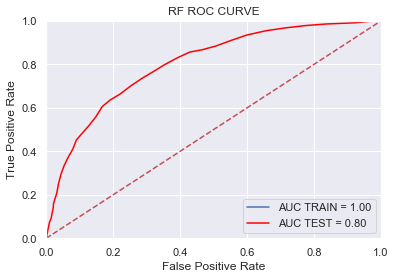

In [24]:
"""
RANDOM FOREST - Crash Probability
"""

# this function grabs the feature importance for only the ones that are above average
def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

fm01_RF = RandomForestClassifier( n_estimators = 50, random_state=1 )
fm01_RF = fm01_RF.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)

print("\n=============\n")
print("RANDOM FOREST\n")
print("Probability of crash")
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")



probs = fm01_RF.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test


feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

for i in vars_RF_flag :
   print( i )

plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
"""
RANDOM FOREST - Damage Amount
"""

amt_m01_RF = RandomForestRegressor(n_estimators = 100, random_state=1)
amt_m01_RF = amt_m01_RF.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_RF.predict(W_train)
Z_Pred_test = amt_m01_RF.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("RF RMSE Train:", RMSE_TRAIN )
print("RF RMSE Test:", RMSE_TEST )

RMSE_RF = RMSE_TEST

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( amt_m01_RF, feature_cols )

for i in vars_RF_amt :
   print( i )

RF RMSE Train: 1859.5813083621624
RF RMSE Test: 4654.622997783017
('BLUEBOOK', 100)
('TRAVTIME', 62)
('IMP_INCOME', 58)
('IMP_AGE', 57)
('OLDCLAIM', 45)
('IMP_HOME_VAL', 40)
('IMP_YOJ', 33)
('MVR_PTS', 31)
('IMP_CAR_AGE', 30)
('TIF', 28)
('NPOLICY', 19)
('CLM_FREQ', 18)
('HOMEKIDS', 17)
